In [67]:
import sys
sys.path.append('/sbnd/app/users/brindenc/mypython') #My utils path
from bc_utils.CAFana import pic as CAFpic
from bc_utils.utils import pic
from time import time
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
#Constants/parameters
pot1 = 15e16
pot2 = 20e20
SEED = 42
n = 100 #number of random universes
E_threshold = 0.021 #GeV energy threshold for visible hadron (ArgoNeut)
E_threshold_exotic = E_threshold #Set same for now
#DATA_DIR = '/pnfs/sbnd/persistent/users/brindenc/analyze_sbnd/nue/v09_43_00/data'
#DATA_DIR = '/sbnd/data/users/brindenc/analyze_sbnd/nue/v09_58_02/'
DATA_DIR = '../test_fcl/'
savename = 'nuecc.pkl'
savename_Np = 'nueccNp.pkl'
savename_signal = 'nue.pkl'
exotic_hadrons = [3112,321,4122,3222] #Make cuts on these?

In [35]:
nue_tree1 = uproot.open(f'{DATA_DIR}CAFnue1.root:recTree;1')
nuecc_tree1 = uproot.open(f'{DATA_DIR}CAFnuecc1.root:recTree;1')
nuekeys = nue_tree1.keys()
nuecckeys = nuecc_tree1.keys()

In [36]:
prim_keys = [key for key in nuekeys if CAFpic.primprefix in key]
shw_keys = [key for key in nuekeys if CAFpic.shwprefix in key]
trk_keys = [key for key in nuekeys if CAFpic.trkprefix in key]
reco_keys = [key for key in nuekeys if CAFpic.recoprefix in key]

nue_mc = CAFpic.get_df(nue_tree1,prim_keys)
nue_shw = CAFpic.get_df(nue_tree1,shw_keys)
nue_trk = CAFpic.get_df(nue_tree1,trk_keys)
nue_reco = CAFpic.get_df(nue_tree1,reco_keys)

In [37]:
mcnu_keys = [key for key in nuecckeys if CAFpic.nuprefix in key]
shw_keys = [key for key in nuecckeys if CAFpic.shwprefix in key]
trk_keys = [key for key in nuecckeys if CAFpic.trkprefix in key]
reco_keys = [key for key in nuecckeys if CAFpic.recoprefix in key]

nuecc_mcnu= CAFpic.get_df(nuecc_tree1,mcnu_keys)
nuecc_shw = CAFpic.get_df(nuecc_tree1,shw_keys)
nuecc_trk= CAFpic.get_df(nuecc_tree1,trk_keys)
nuecc_reco = CAFpic.get_df(nuecc_tree1,reco_keys)

In [66]:
a = np.ones((3,3))
a[:,0] = 0
np.std(a,axis=0),a

a[:-2]

array([[0., 1., 1.]])

In [38]:
pots = nuecc_tree1.arrays('rec.hdr.pot',library='pd')
pot_nuecc = float(pots.iloc[0])
events_nuecc = len(nuecc_mcnu[0].index.drop_duplicates())

In [60]:
nuecc_tree1.arrays('rec.reco.nshw',library='pd')

,rec.reco.nshw
0,3
1,1
2,2
3,1
4,2
...,...
91,0
92,0
93,1
94,0


In [58]:
nshw_nuecc_index = CAFpic.find_index_with_key(nuecc_reco,f'{CAFpic.recoprefix}nshw') #same as ntrk
nshw_nuecc_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [57]:
nuecc_reco[0].head()

,,,rec.reco.hit..length,rec.reco.hit.RMS,rec.reco.hit.cryoID,rec.reco.hit.integral,rec.reco.hit.peakAmplitude,rec.reco.hit.peakTime,rec.reco.hit.planeID,rec.reco.hit.spacepoint.ID,rec.reco.hit.spacepoint.XYZ.x,rec.reco.hit.spacepoint.XYZ.y,...,rec.reco.stub.planes.hits..totarraysize,rec.reco.stub.truth.matches..totarraysize,rec.reco.stub.truth.p.daughters..totarraysize,rec.reco.trk..length,rec.reco.trk.calo.0.points..totarraysize,rec.reco.trk.calo.1.points..totarraysize,rec.reco.trk.calo.2.points..totarraysize,rec.reco.trk.pfp.daughters..totarraysize,rec.reco.trk.truth.matches..totarraysize,rec.reco.trk.truth.p.daughters..totarraysize
rec.hdr.run,rec.hdr.subrun,rec.hdr.evt,,,,,,,,,,,,,,,,,,,,,


In [23]:
a=None
a is not None

False

In [24]:
f'{CAFpic.nuprefix}iscc'

'rec.mc.nu.iscc'

In [26]:
nuecc_mcnu[0].keys()

Index(['rec.mc.nu..length', 'rec.mc.nu.E', 'rec.mc.nu.Q2',
       'rec.mc.nu.baseline', 'rec.mc.nu.bjorkenX', 'rec.mc.nu.cryostat',
       'rec.mc.nu.det', 'rec.mc.nu.eccqe', 'rec.mc.nu.genVersion..length',
       'rec.mc.nu.genVersion..totarraysize', 'rec.mc.nu.genVersion..idx',
       'rec.mc.nu.generator', 'rec.mc.nu.genie_inttype',
       'rec.mc.nu.genie_mode', 'rec.mc.nu.genweight', 'rec.mc.nu.hitnuc',
       'rec.mc.nu.imp_weight', 'rec.mc.nu.index', 'rec.mc.nu.inelasticityY',
       'rec.mc.nu.initpdg', 'rec.mc.nu.is_numucc_primary', 'rec.mc.nu.iscc',
       'rec.mc.nu.ischarm', 'rec.mc.nu.isnc', 'rec.mc.nu.isseaquark',
       'rec.mc.nu.isvtxcont', 'rec.mc.nu.modq', 'rec.mc.nu.modq_lab',
       'rec.mc.nu.momentum.x', 'rec.mc.nu.momentum.y', 'rec.mc.nu.momentum.z',
       'rec.mc.nu.nneutron', 'rec.mc.nu.npiminus', 'rec.mc.nu.npiplus',
       'rec.mc.nu.npizero', 'rec.mc.nu.nprim', 'rec.mc.nu.nproton',
       'rec.mc.nu.parent_dcy_E', 'rec.mc.nu.parent_dcy_mode',
       'rec.m

In [27]:
iscc_nuecc_index = CAFpic.find_index_with_key(nuecc_mcnu,f'{CAFpic.nuprefix}iscc') #same as truth pdg
indeces_nuecc = nuecc_mcnu[0].index.drop_duplicates()
nuecc_drop_indeces = CAFpic.get_pot_normalized_indeces(indeces_nuecc,pot1,pot_nuecc)

  #nuecc
nuecc_mc_pot1 = [CAFpic.get_df_dropindeces(df,nuecc_drop_indeces) for df in nuecc_mcnu] #1st ele has most info
iscc_nuecc_index
#cut1 = nuecc_mc_pot1[iscc_nuecc_index][nuecc_mc_pot1[iscc_nuecc_index].loc[:,f'{CAFpic.nuprefix}iscc'] == 1] #Keep only cc events

[0]


0

In [15]:
nuecc_mc_pot1 = [CAFpic.get_pot_normalized_df(df,pot1,pot_nuecc,events_nuecc,seed=42)[0] for df in nuecc_mc]
nuecc_shw_pot1 = [CAFpic.get_pot_normalized_df(df,pot1,pot_nuecc,events_nuecc,seed=42)[0] for df in nuecc_shw]

MultiIndex([(1, 1,   3),
            (1, 1,   6),
            (1, 1,  26),
            (1, 1,  66),
            (1, 1,  67),
            (1, 1,  69),
            (1, 1,  75),
            (1, 1,  76),
            (1, 1,  89),
            (1, 1, 104),
            (1, 1, 132),
            (1, 1, 134),
            (1, 1, 141),
            (1, 1, 154),
            (1, 1, 169),
            (1, 1, 177),
            (1, 1, 195),
            (1, 1, 223),
            (1, 1, 224),
            (1, 1, 261),
            (1, 1, 275),
            (1, 1, 291),
            (1, 1, 294),
            (1, 1, 306),
            (1, 1, 343),
            (1, 1, 344),
            (1, 1, 347),
            (1, 1, 351),
            (1, 1, 382),
            (1, 1, 386),
            (1, 1, 392),
            (1, 1, 397),
            (1, 1, 411),
            (1, 1, 423),
            (1, 1, 436),
            (1, 1, 451),
            (1, 1, 453),
            (1, 1, 476),
            (1, 1, 480),
            (1, 1, 485),


ValueError: Cannot take a larger sample than population when 'replace=False'

In [26]:
nuecc_mc_pot1[0].shape
#nuecc_mc[0].shape

(11, 4)

In [6]:
def find_index_with_key(dfs,key):
  """Find df which contains key specified, returns indeces of df list
  It should only return one index"""
  indeces = []
  for i,df in enumerate(dfs):
    keys = df.keys()
    if key in keys:
      indeces.append(i)
  if len(indeces) == 1:
    return indeces[0]
  return indeces


In [85]:
lengthdf = nuecc_tree1.arrays(['rec.reco.trk..length','rec.reco.trk.ID'],library='pd')

In [86]:
lengthdf

,,rec.reco.trk..length,rec.reco.trk.ID
entry,subentry,,
0,0,1,-2147483648
4,0,1,-2147483648
5,0,1,-2147483648
6,0,1,-2147483648
7,0,3,-2147483648
...,...,...,...
93,1,2,-2147483648
94,0,1,-2147483648
95,0,3,-2147483648


In [19]:
find_index_with_key(nuecc_trk,'rec.reco.trk.pfp.daughters')

[4]

In [32]:
len(nuecc_reco)

17

In [30]:
nue_shw[0].head()

,,,rec.reco.shw..length,rec.reco.shw.bestplane,rec.reco.shw.bestplane_dEdx,rec.reco.shw.bestplane_energy,rec.reco.shw.conversion_gap,rec.reco.shw.cosmicDist,rec.reco.shw.density,rec.reco.shw.dir.x,rec.reco.shw.dir.y,rec.reco.shw.dir.z,...,rec.reco.shw.truth.p.startE,rec.reco.shw.truth.p.startT,rec.reco.shw.truth.p.start_process,rec.reco.shw.truth.p.startp.x,rec.reco.shw.truth.p.startp.y,rec.reco.shw.truth.p.startp.z,rec.reco.shw.truth.p.wallin,rec.reco.shw.truth.p.wallout,rec.reco.shw.truth.pur,rec.reco.shw.truth.visEintrk
rec.hdr.run,rec.hdr.subrun,rec.hdr.evt,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,2,1.912785,0.405215,0.309071,3.402823e+38,3.704388,-0.034258,-0.088096,0.995523,...,0.432557,1.367286,0,0.016059,-0.009971,0.432143,0,0,1.0,1.083583


In [29]:
len(nuecc_shw)

5

In [59]:
nuecc_trk[1].keys()

Index(['rec.reco.trk..length', 'rec.reco.trk.calo.0.points..totarraysize',
       'rec.reco.trk.calo.0.points.dedx', 'rec.reco.trk.calo.0.points.dqdx',
       'rec.reco.trk.calo.0.points.integral',
       'rec.reco.trk.calo.0.points.pitch', 'rec.reco.trk.calo.0.points.rr',
       'rec.reco.trk.calo.0.points.sumadc', 'rec.reco.trk.calo.0.points.t',
       'rec.reco.trk.calo.0.points.wire',
       'rec.reco.trk.calo.1.points..totarraysize',
       'rec.reco.trk.calo.2.points..totarraysize',
       'rec.reco.trk.pfp.daughters..totarraysize',
       'rec.reco.trk.truth.matches..totarraysize',
       'rec.reco.trk.truth.p.daughters..totarraysize'],
      dtype='object')

In [23]:
nuecc_mc[0].head()
#nue_mc.head()

,,,rec.mc.nu.prim..length,rec.mc.nu.prim..totarraysize,rec.mc.nu.prim.daughters..totarraysize,rec.mc.nu.prim..idx
rec.hdr.run,rec.hdr.subrun,rec.hdr.subevt,,,,
1,0,0,2,2,0,0


In [13]:
nue_shw[0].keys()

Index(['rec.reco.shw..length', 'rec.reco.shw.bestplane',
       'rec.reco.shw.bestplane_dEdx', 'rec.reco.shw.bestplane_energy',
       'rec.reco.shw.conversion_gap', 'rec.reco.shw.cosmicDist',
       'rec.reco.shw.density', 'rec.reco.shw.dir.x', 'rec.reco.shw.dir.y',
       'rec.reco.shw.dir.z',
       ...
       'rec.reco.shw.truth.p.startE', 'rec.reco.shw.truth.p.startT',
       'rec.reco.shw.truth.p.start_process', 'rec.reco.shw.truth.p.startp.x',
       'rec.reco.shw.truth.p.startp.y', 'rec.reco.shw.truth.p.startp.z',
       'rec.reco.shw.truth.p.wallin', 'rec.reco.shw.truth.p.wallout',
       'rec.reco.shw.truth.pur', 'rec.reco.shw.truth.visEintrk'],
      dtype='object', length=120)

In [58]:
[key for key in nue_reco[0].keys() if 'c' in key]

['rec.reco.nshw',
 'rec.reco.nstub',
 'rec.reco.ntrk',
 'rec.reco.shw..length',
 'rec.reco.shw.bestplane',
 'rec.reco.shw.bestplane_dEdx',
 'rec.reco.shw.bestplane_energy',
 'rec.reco.shw.conversion_gap',
 'rec.reco.shw.cosmicDist',
 'rec.reco.shw.density',
 'rec.reco.shw.dir.x',
 'rec.reco.shw.dir.y',
 'rec.reco.shw.dir.z',
 'rec.reco.shw.end.x',
 'rec.reco.shw.end.y',
 'rec.reco.shw.end.z',
 'rec.reco.shw.len',
 'rec.reco.shw.open_angle',
 'rec.reco.shw.pfp.daughters..length',
 'rec.reco.shw.pfp.daughters..totarraysize',
 'rec.reco.shw.pfp.daughters..idx',
 'rec.reco.shw.pfp.id',
 'rec.reco.shw.pfp.ndaughters',
 'rec.reco.shw.pfp.parent',
 'rec.reco.shw.pfp.parent_is_primary',
 'rec.reco.shw.pfp.slcID',
 'rec.reco.shw.pfp.trackScore',
 'rec.reco.shw.plane.0.dEdx',
 'rec.reco.shw.plane.0.energy',
 'rec.reco.shw.plane.0.nHits',
 'rec.reco.shw.plane.0.wirePitch',
 'rec.reco.shw.plane.1.dEdx',
 'rec.reco.shw.plane.1.energy',
 'rec.reco.shw.plane.1.nHits',
 'rec.reco.shw.plane.1.wirePitch

array([[<AxesSubplot:title={'center':'rec.reco.trk..length'}>]],
      dtype=object)

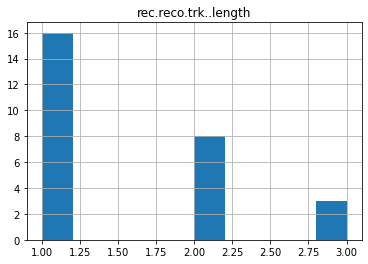

In [51]:
nue_trk[0].hist('rec.reco.trk..length')
#plt.grid('off')